In [41]:
from bs4 import BeautifulSoup as bsoup
import pandas as pd 
import numpy as np
import requests
import pprint
import matplotlib.pyplot as plt
import seaborn as sns    



In [42]:
#Main link to the website

linkHouses = 'https://www.buyrentkenya.com/houses-for-rent'

In [43]:
#Generating links for the firdt 50 pages

links =[]

for i in range(2,70):
    link = (linkHouses + f"?page={i}")
    links.append(link)


In [44]:
#Creating a soup object for each link

main_soup =[]
for i in links[1:]:
    text = requests.get(i)
    soup = bsoup(text.text,'lxml')
    main_soup.append(soup)

len(main_soup)

67

In [45]:
#Extracting the houses and location

spans =[]
for i in main_soup:
   spans.append( i.find_all('span',class_='relative top-[2px] hidden md:inline'))
    
spans

houses=[]
for span in spans:
   houses.append([str(i.text).strip() for i in span])
   




In [46]:
#Extracting the Prices of the houses

divs = []
for i in main_soup:
    div =i.find_all('div',class_='flex items-center justify-center text-xl font-bold leading-7 text-grey-900')
    divs.append(div)  

        

prices=[]
for div in divs:
    text = [str(i.text).strip().split()[1] for i in div[::2]]
    prices.append(text)
    


 
# prices      
    

len(prices)
 
# prices.append(text.split()[1])   


67

In [47]:
#Ensuring that the number of houses is equal to the number of prices extracted from a paage for it to be included in the data set
mainHouses = [i for i,j in zip(houses,prices) if len(i)==len(j)]
mainPrices = [i for i,j in zip(prices,houses) if len(i)==len(j)]

In [48]:
#Creating one list for all houses and prices
mainPrices =[i for j in mainPrices for i in j]
mainHouses = [i for j in mainHouses for i in j]

In [49]:
#Creating a dictionary for use to create  a dataframe
dictHouses = {'Houses':mainHouses, 'Prices':mainPrices}
dictHouses

{'Houses': ['4 Bed Villa with En Suite at Grevillea Grove Road',
  '5 Bed Villa with En Suite at Peponi Road',
  '4 Bed Villa with En Suite in Runda',
  '4 Bed House with En Suite at Acacia Road',
  '5 Bed House with En Suite in Spring Valley',
  '4 Bed Townhouse with En Suite at Mugumo Road',
  '4 Bed House with En Suite in Runda',
  '4 Bed House with En Suite at Rosslyn',
  '4 Bed House with En Suite in Lower Kabete',
  '4 Bed Townhouse with Staff Quarters at Off Olenguruone Road',
  '4 Bed Townhouse with Staff Quarters at Eden Ville Phase 1',
  '4 Bed Townhouse with Swimming Pool at Kencom Estate',
  '4 Bed House with En Suite at Runda',
  '6 Bed House with En Suite in Runda',
  '6 Bed House with En Suite in Nyari',
  '2 Bed House with En Suite at Off Pan African Insurance Lane',
  '4 Bed House with En Suite at Off Pan African Insurance Lane',
  '5 Bed House with En Suite in Runda',
  '5 Bed House with En Suite in Runda',
  '4 Bed Townhouse with En Suite in Lavington',
  '4 Bed Hous

In [56]:
 #A dataframe to be cleaned further and prepped for analysis
dfHouses= pd.DataFrame.from_dict(data=dictHouses)
dfHouses

,Houses,Prices
0,4 Bed Villa with En Suite at Grevillea Grove Road,"300,000"
1,5 Bed Villa with En Suite at Peponi Road,"580,000"
2,4 Bed Villa with En Suite in Runda,"500,000"
3,4 Bed House with En Suite at Acacia Road,"300,000"
4,5 Bed House with En Suite in Spring Valley,"450,000"
...,...,...
1304,5 Bed Townhouse with En Suite in Kileleshwa,"350,000"
1305,4 Bed Townhouse with En Suite in Kileleshwa,"330,000"
1306,1 Bed House with En Suite at Nyari,"100,000"
1307,2 Bed House with En Suite in Lavington,"175,000"


In [57]:
# dfHouses.to_excel('houses.xlsx',index=False)
dfHouses['Houses']


0       4 Bed Villa with En Suite at Grevillea Grove Road
1                5 Bed Villa with En Suite at Peponi Road
2                      4 Bed Villa with En Suite in Runda
3                4 Bed House with En Suite at Acacia Road
4              5 Bed House with En Suite in Spring Valley
                              ...                        
1304          5 Bed Townhouse with En Suite in Kileleshwa
1305          4 Bed Townhouse with En Suite in Kileleshwa
1306                   1 Bed House with En Suite at Nyari
1307               2 Bed House with En Suite in Lavington
1308                5 Bed House with En Suite at Kitisuru
Name: Houses, Length: 1309, dtype: object

In [58]:
dfHouses[dfHouses['Houses'].str.contains('with')]

,Houses,Prices
0,4 Bed Villa with En Suite at Grevillea Grove Road,"300,000"
1,5 Bed Villa with En Suite at Peponi Road,"580,000"
2,4 Bed Villa with En Suite in Runda,"500,000"
3,4 Bed House with En Suite at Acacia Road,"300,000"
4,5 Bed House with En Suite in Spring Valley,"450,000"
...,...,...
1304,5 Bed Townhouse with En Suite in Kileleshwa,"350,000"
1305,4 Bed Townhouse with En Suite in Kileleshwa,"330,000"
1306,1 Bed House with En Suite at Nyari,"100,000"
1307,2 Bed House with En Suite in Lavington,"175,000"


In [59]:
def location(row):
    estate=''
    loc =row['Houses'].split()
    
    InIsHere = 'in' in loc
    AtIsHere = 'at'in loc
    

   
    
  
    
    if InIsHere == True:   
        indIn = loc.index('in')     
        estate = loc[indIn+1:]   
        str ='' 
        
        for i in estate:
            str += f'{i} '
        return str.strip()
    elif AtIsHere == True  :        
        indAt = loc.index('at')
        estate = loc[indAt+1:]
        
        str ='' 
        
        for i in estate:
            str += f'{i} '
        return str.strip() 
    elif InIsHere== False or AtIsHere== False:
        return 404  


    
dfHouses['Towns'] = dfHouses.apply(location, axis= 1)
dfHouses.head(12)

,Houses,Prices,Towns
0,4 Bed Villa with En Suite at Grevillea Grove Road,"300,000",Grevillea Grove Road
1,5 Bed Villa with En Suite at Peponi Road,"580,000",Peponi Road
2,4 Bed Villa with En Suite in Runda,"500,000",Runda
3,4 Bed House with En Suite at Acacia Road,"300,000",Acacia Road
4,5 Bed House with En Suite in Spring Valley,"450,000",Spring Valley
5,4 Bed Townhouse with En Suite at Mugumo Road,"300,000",Mugumo Road
6,4 Bed House with En Suite in Runda,"300,000",Runda
7,4 Bed House with En Suite at Rosslyn,"450,000",Rosslyn
8,4 Bed House with En Suite in Lower Kabete,"450,000",Lower Kabete
9,4 Bed Townhouse with Staff Quarters at Off Ole...,"400,000",Off Olenguruone Road


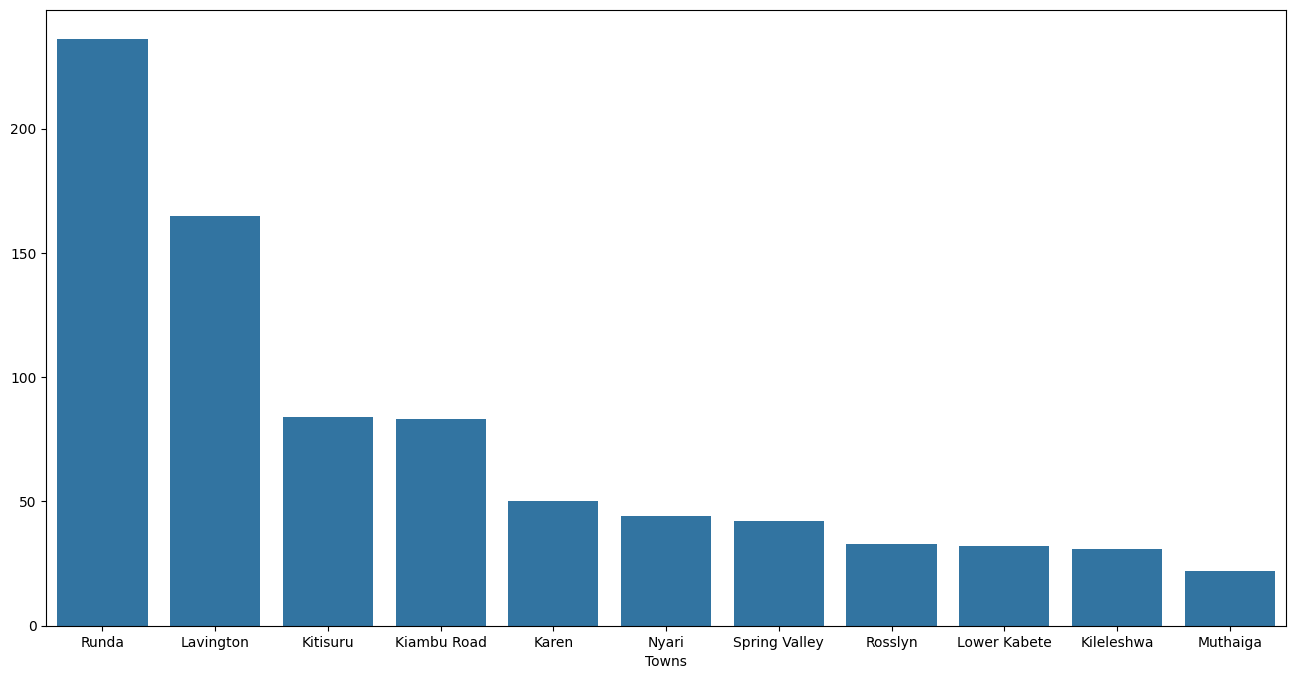

In [60]:
locationRank = dfHouses['Towns'].value_counts()[:11]

plt.figure(figsize=(16,8))
sns.barplot(x=locationRank.index,y=locationRank.values)

plt.show()

In [61]:
# links2 =[]

# for i in range(2,51):
#     link2 = (linkHouses + f"?page={i}")
#     links2.append(link)
